SAP-ID: 60009220209    NAME: HITARTH BHATT   BATCH: D1-2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features,true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [ ]:
kmeans_kwargs= {"init":"random", "n_init":10,"max_iter":300,"random_state":42,}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

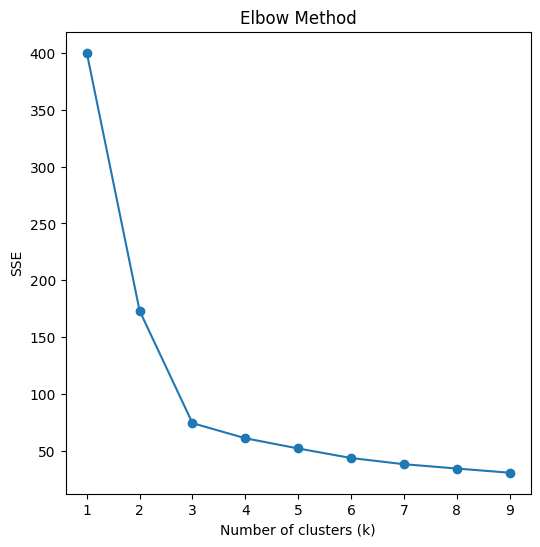

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="SSE")
plt.title(label="Elbow Method")
plt.show()

This code performs the "Elbow Method" for determining the optimal number of clusters in KMeans clustering. It iterates over a range of values for the number of clusters (k), fits a KMeans model with each value of k to the scaled dataset (scaled_features), calculates the sum of squared distances from each point to its assigned cluster center (inertia), and appends this value to a list (sse). Finally, it plots the number of clusters against the corresponding SSE values and displays the plot. The "elbow" in the plot represents the optimal number of clusters, where adding more clusters does not lead to a significant decrease in SSE.

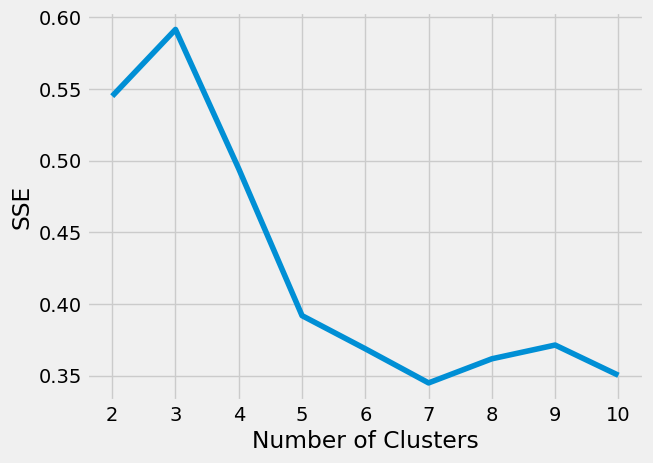

In [ ]:
sil_coef=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features, kmeans.labels_)
    sil_coef.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


This code calculates the silhouette score for a range of cluster numbers (from 2 to 10) using KMeans clustering. For each cluster number, it initializes a KMeans model with specified parameters (n_clusters, n_init, max_iter, random_state), fits the model to the scaled dataset (scaled_features), and computes the silhouette score based on the clustering results. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation), with values ranging from -1 to 1. Higher silhouette scores indicate better clusterings. Finally, it plots the number of clusters against the corresponding silhouette scores and displays the plot. This visualization helps to identify the optimal number of clusters based on the silhouette scores, with higher scores indicating better-defined clusters.

In [ ]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline


In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

r = urllib.request.urlretrieve (full_download_url, archive_name)

tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile="TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file="TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)

true_label_names=np.genfromtxt(labels_file, delimiter=",", usecols=(1,), skip_header=1, dtype="str")


In [ ]:
data[:5,2]

array([3.26552691, 1.58842082, 4.32719872, 4.50764878, 2.82154696])

In [ ]:
le = LabelEncoder()
true_labels = le.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
n_clusters = len(le.classes_)

In [ ]:
preprocessor = Pipeline([('scaler',MinMaxScaler()),("pca",PCA(n_components=2,random_state=42)),])

his code constructs a preprocessing pipeline using scikit-learn's Pipeline class. It first scales the features using MinMaxScaler to ensure uniform scales across features. Then, it reduces the dimensionality of the data to two principal components using PCA for better visualization and potentially improved model performance. This pipeline streamlines the data transformation process and enhances reproducibility in subsequent analysis or modeling tasks.





In [ ]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [ ]:
pipe = Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)

In [ ]:
predicted_labels = pipe ["clusterer"]["kmeans"].labels_

In [ ]:
silhouette_score (preprocessed_data, predicted_labels)

0.5118775528450281

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [ ]:
pcadf= pd.DataFrame (pipe ["preprocessor"].transform(data), columns=["component_1", "component_2"],)
pcadf["predicted_cluster"] = pipe ["clusterer"]["kmeans"].labels_

pcadf["true_label"] = le.inverse_transform(true_labels)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
train_url="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train=pd.read_csv(train_url)

test_url="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test=pd.read_csv(test_url)

In [ ]:
print("Train_Set")

print(train.head())

print("\n")

print(" Test_Set ")

print(test.head())

Train_Set
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          249
Embarked         0
dtype: int64


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le = LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])


In [ ]:
features = ['Sex','Age','PClass']
